# ZSWIM6

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using gpsea version 0.9.6.dev0


### ZSWIM6
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for ZSWIM6.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'ZSWIM6'
mane_tx_id = 'NM_020928.2'

mane_protein_id = 'NP_065979.1' # zinc finger SWIM domain-containing protein 6
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.24') as ps:
        phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc_results = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
qc_results.summarize()

Individuals Processed: 100%|██████████| 16/16 [00:00<00:00, 91.10 individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #14
    individual
     warnings:
     ·ontology_class of the time_at_last_encounter field cannot be parsed into age. Consider formatting the age as ISO8601 duration (e.g., "P31Y2M" for 31 years and 2 months)


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
13,Global developmental delay
9,Hypertelorism
8,Bifid nose
7,Intellectual disability
7,Hypotonia
6,Unsteady gait
6,Absent speech
6,Midline central nervous system lipomas
5,Happy demeanor
5,Autistic behavior


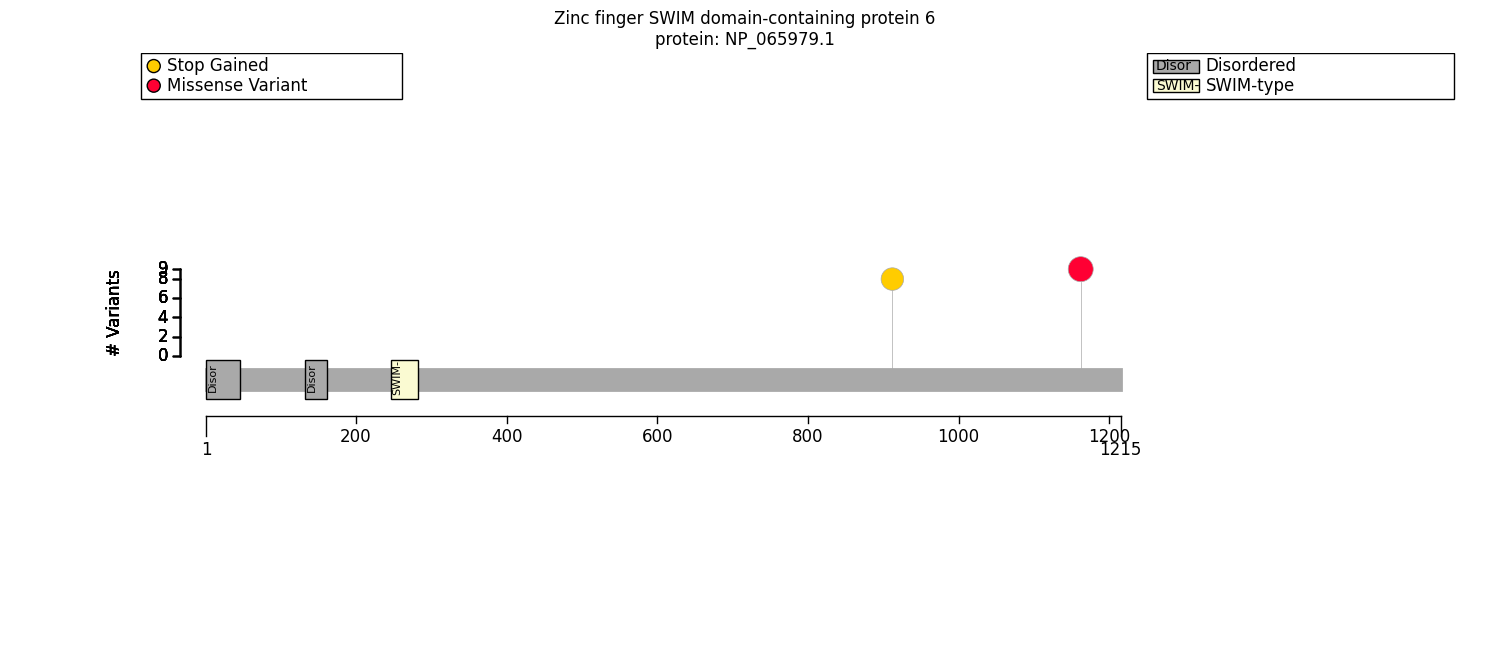

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

zswim6_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
zswim6_fig.tight_layout()

## Genotype-Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.view import MtcStatsViewer
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_key

r913ter = variant_key("5_61541917_61541917_C_T") # c.2737C>T; p.Arg913Ter
r913w = variant_key("5_61544156_61544156_C_T")   # c.3487C>T; p.Arg1163Trp

r913_clf = monoallelic_classifier(
    a_predicate=r913ter, 
    b_predicate=r913w, 
    a_label="Arg913Ter", 
    b_label= "Arg1163Trp")
r913_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r913_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(r913_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,6
Skipping term because one genotype had zero observations,47
"Skipping ""general"" level terms",59
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),203


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=r913_result)

Allele group,Arg913Ter,Arg1163Trp,Corrected p values,p values
Abnormal nasal morphology [HP:0005105],1/1 (100%),9/9 (100%),1.0,1.0
Abnormal eyelid morphology [HP:0000492],3/3 (100%),7/7 (100%),1.0,1.0
Aplasia/Hypoplasia involving the central nervous system [HP:0002977],5/5 (100%),2/2 (100%),1.0,1.0
Abnormal cerebral morphology [HP:0002060],5/5 (100%),3/3 (100%),1.0,1.0
Abnormal forebrain morphology [HP:0100547],5/5 (100%),3/3 (100%),1.0,1.0
Abnormal brain morphology [HP:0012443],5/5 (100%),4/4 (100%),1.0,1.0
Abnormal oral cavity morphology [HP:0000163],5/5 (100%),4/4 (100%),1.0,1.0
Morphological central nervous system abnormality [HP:0002011],5/5 (100%),7/7 (100%),1.0,1.0
Abnormal ocular adnexa morphology [HP:0030669],6/6 (100%),7/7 (100%),1.0,1.0
Neurodevelopmental abnormality [HP:0012759],7/7 (100%),6/6 (100%),1.0,1.0


# Summary

In [9]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
    GPAnalysisResultSummary.from_multi(
        result=r913_result,
    ),
)

caption = "No statistically significant results identified."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [10]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
Arg913Ter,Arg1163Trp,12,0


In [11]:
summarizer.process_latex(report=report, protein_fig=zswim6_fig)

Figure saved to ../../supplement/img/ZSWIM6_protein_diagram-draft.pdf
Output to ../../supplement/tex/ZSWIM6_summary_draft.tex
